<a href="https://colab.research.google.com/github/AmineMarnissi/AmineMarnissi/blob/main/gpa_Flir_tsne_vis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np # linear algebra
import seaborn as sns
import matplotlib
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

sns.set_style("darkgrid", {"axes.facecolor": ".95"})
%config InlineBackend.figure_format = 'svg'

In [ ]:
src_cs_data = pd.read_csv('/content/drive/MyDrive/data_flir_vis_o.csv', error_bad_lines=False)
src_cs_X = src_cs_data.loc[:,"# f0":"f2047"]
src_cs_Y = src_cs_data["label"]

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
src_cs_Z = src_cs_Y.replace(1.0,"s_car")
src_cs_Z = src_cs_Z.replace(2.0,"s_bicycle")
src_cs_Z = src_cs_Z.replace(3.0,"s_person")

In [ ]:
tgt_fg_data = pd.read_csv('/content/drive/MyDrive/data_flir_tr_o.csv', error_bad_lines=False)
tgt_fg_X = tgt_fg_data.loc[:,"# f0":"f2047"]
tgt_fg_Y = tgt_fg_data["label"]

In [ ]:
tgt_fg_Z = tgt_fg_Y.replace(1.0,"t_car")
tgt_fg_Z = tgt_fg_Z.replace(2.0,"t_bicycle")
tgt_fg_Z = tgt_fg_Z.replace(3.0,"t_person")

In [ ]:
X = pd.concat([src_cs_X, tgt_fg_X])
Z = pd.concat([src_cs_Z, tgt_fg_Z],ignore_index=True, sort=False)

In [ ]:
tsne = TSNE()
X_tsne = tsne.fit_transform(X)

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [ ]:
def Merge(dict1, dict2):
    return({**dict1, **dict2})
s_palette = dict(s_bicycle="#4DBBAE",s_car="#DD7E0E",s_person="#B55475")
t_palette = dict(t_bicycle="#BEF8F2",t_car="#FADBB5",t_person="#ECD3DC")
palette = Merge(s_palette, t_palette)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


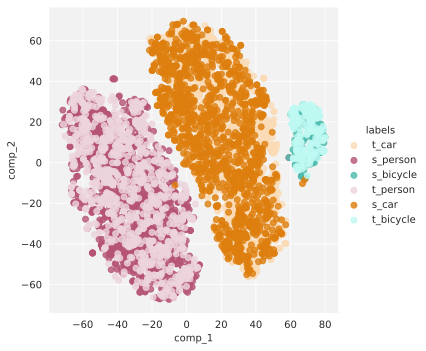

In [ ]:
matplotlib.rcParams['figure.figsize'] = (20.0, 20.0)
proj = pd.DataFrame(X_tsne)
proj.columns = ["comp_1", "comp_2"]
proj["labels"] = Z
sns_plot = sns.lmplot("comp_1", "comp_2", hue = "labels", data = proj.sample(5000),palette = palette ,fit_reg=False)
sns_plot.savefig('output.png')

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


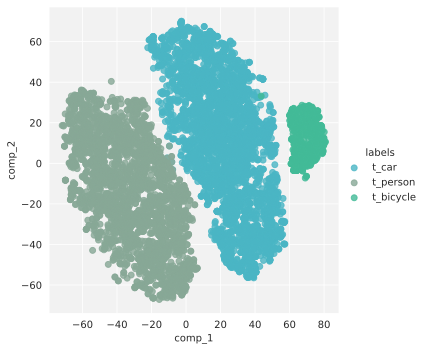

In [ ]:
options = ['t_car', 't_bicycle','t_person']
v_palette = dict(t_bicycle="#42BA97",t_car="#4AB5C4",t_person="#87A896")
# selecting rows based on condition
rslt_df = proj[proj['labels'].isin(options)]
sns_plot = sns.lmplot("comp_1", "comp_2", hue = "labels", data = rslt_df.sample(8000),palette = v_palette ,fit_reg=False)
sns_plot.savefig('output_.png')

In [ ]:
tsne = TSNE(n_components=3)
X_tsne3d = tsne.fit_transform(X) 

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [ ]:
proj = pd.DataFrame(X_tsne3d)
proj.columns = ["comp_1", "comp_2","comp_3"]
proj["labels"] = Z

In [ ]:
Z = Z.replace("s_bicycle","#4DBBAE")
Z = Z.replace("t_bicycle","#BEF8F2")
Z = Z.replace("s_car","#DD7E0E")
Z = Z.replace("t_car","#FADBB5")
Z = Z.replace("s_person","#B55475")
Z = Z.replace("t_person","#ECD3DC")

In [ ]:
import matplotlib.pyplot as plt
#Visualizing 3D
figure = plt.figure(figsize=(9,9))
axes = figure.add_subplot(111,projection = "3d",facecolor='white')
axes.view_init(20, -20)
axes.set_xlabel('comp_1')
axes.set_ylabel('comp_2')
axes.set_zlabel('comp_3')
dots = axes.scatter(xs = proj['comp_1'],ys = proj['comp_2'],zs = proj['comp_3'],c=Z)
axes.figure.savefig('file.png')